In [1]:
import pandas as pd

In [11]:
#Reading the .csv datasets 

movies = pd.read_csv(r"D:\1.  Data science\Python\14th july - pandas project\movie.csv", sep = ',')
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [12]:
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [13]:
tags = pd.read_csv(r"D:\1.  Data science\Python\14th july - pandas project\tag.csv", sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,24-04-2009 18:19
1,65,208,dark hero,10-05-2013 01:41
2,65,353,dark hero,10-05-2013 01:41
3,65,521,noir thriller,10-05-2013 01:39
4,65,592,dark hero,10-05-2013 01:41


In [14]:
ratings = pd.read_csv(r"D:\1.  Data science\Python\14th july - pandas project\rating.csv", sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [15]:
# removing the timestamp from the ratings & tags

del ratings['timestamp']
del tags['timestamp']

In [16]:
# .iloc[]- allow to select rows and columns by their integer position9(not by label names)

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [17]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [19]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [20]:
row_0['userId']

18

In [21]:
row_0.name

0

In [22]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [23]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [24]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [25]:
tags.iloc[[0,11,500]] #selecting the row index of 0,11,500

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


In [27]:
# Descriptive Statistics

ratings['rating'].describe() # describe of rating column in the  ratings dataset

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [28]:
ratings.describe() # describing the  ratings dataset

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [29]:
# mean of ratings column
ratings['rating'].mean()

3.5255285642993797

In [30]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [31]:
# minimum value in ratings column
ratings['rating'].min()

0.5

In [32]:
# maximum value in ratings column
ratings['rating'].max()

5.0

In [34]:
# standard deviation of the ratings column
ratings['rating'].std()

1.051988919275684

In [36]:
# mode of the ratings column
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [37]:
# correlation of the rating dataset
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [42]:
filter1 =ratings['rating']>10 # filtering/checking any value greater than 10
print(filter1)  
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [43]:
filter2 = ratings['rating']>0 #checking any value less than 10
filter2.all() 

True

### Data cleaning - Handling missing data

In [44]:
movies.shape

(27278, 3)

In [47]:
movies.isnull().any() # CHECKING FOR NULL VALUES IN THE MOVIES DATASET

movieId    False
title      False
genres     False
dtype: bool

In [48]:
movies.isnull().any().any()

False

In [49]:
ratings.shape

(20000263, 3)

In [50]:
ratings.isnull().any().any() #checking for the null values in the ratings dataset

False

In [51]:
tags.shape

(465564, 3)

In [53]:
tags.isnull().any().any() #checking for null values in the tags dataset

True

In [54]:
tags= tags.dropna() #removing the null values from the tags dataset

In [56]:
tags.isnull().any().any()

False

In [57]:
tags.shape

(465548, 3)

### Data visuvalization

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

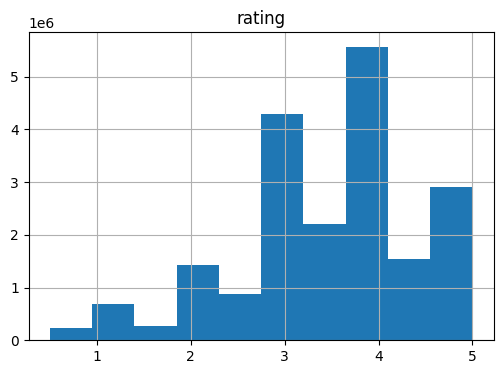

In [61]:
%matplotlib inline

ratings.hist(column='rating',figsize=(6,4))

<Axes: >

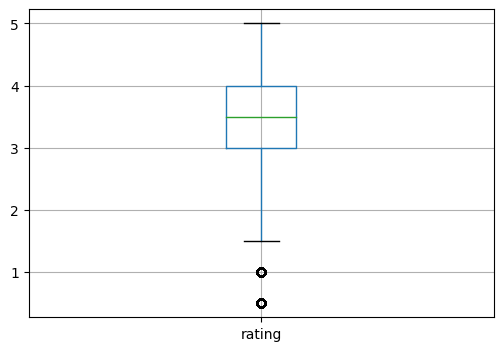

In [62]:
ratings.boxplot(column='rating',figsize=(6,4))

In [64]:
tags['tag'].head() # first 5 values in tag coloum in tags

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [65]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [66]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [68]:
tags_counts= tags['tag'].value_counts() #counting the similar values in the tag colum of tags dataset
tags_counts[-10:]

missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: tag, dtype: int64

<Axes: >

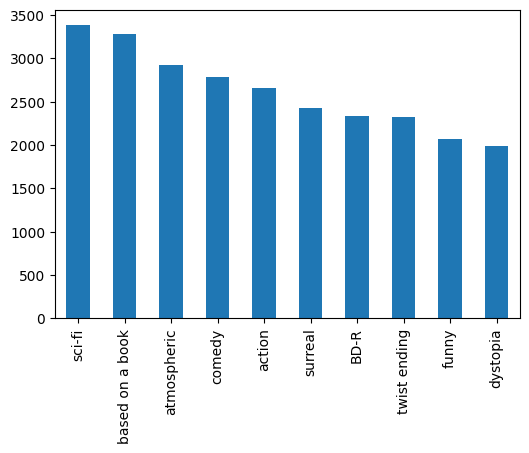

In [77]:
tags_counts[:10].plot(kind='bar',figsize=(6,4))